In [8]:
pip install sdv

  Using cached sdv-1.13.1-py3-none-any.whl.metadata (14 kB)
  Using cached boto3-1.34.125-py3-none-any.whl.metadata (6.6 kB)
  Using cached botocore-1.34.125-py3-none-any.whl.metadata (5.7 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached tqdm-4.66.4-py3-none-any.whl.metadata (57 kB)
  Using cached copulas-0.11.0-py3-none-any.whl.metadata (10 kB)
  Using cached ctgan-0.10.1-py3-none-any.whl.metadata (11 kB)
  Using cached deepecho-0.6.0-py3-none-any.whl.metadata (10 kB)
  Using cached rdt-1.12.1-py3-none-any.whl.metadata (10 kB)
  Using cached sdmetrics-0.14.1-py3-none-any.whl.metadata (10 kB)
  Using cached PyYAML-6.0.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.1 kB)
  Using cached jmespath-1.0.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached s3transfer-0.10.1-py3-none-any.whl.metadata (1.7 kB)
  Using cached urllib3-2.2.1-py3-none-any.whl.metadata (6.4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import evaluate_quality
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt


In [3]:
# Load data from a local CSV file
csv_file_path = '../datasets/crop_fertilizers.csv'
data = pd.read_csv(csv_file_path)

In [4]:
# Define metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)


In [5]:
# Initialize and train the CTGAN model with metadata
synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(data)

/home/nishanth/Documents/codmav/code/.venv/lib/python3.12/site-packages/sdv/single_table/base.py:86: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [6]:
# Generate synthetic data
synthetic_data = synthesizer.sample(4*len(data))  # Generate the same number of rows as the original data

# Save the synthetic data to a new CSV file
synthetic_csv_file_path = '../datasets/synthetic_output.csv'
synthetic_data.to_csv(synthetic_csv_file_path, index=False)

In [6]:

# Visualize the comparison between real and synthetic data
def plot_distributions(real_data, synthetic_data, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(real_data[column], label='Real', color='blue', kde=True, stat="density")
    sns.histplot(synthetic_data[column], label='Synthetic', color='orange', kde=True, stat="density")
    plt.title(f'Distribution of {column}')
    plt.legend()
    plt.show()

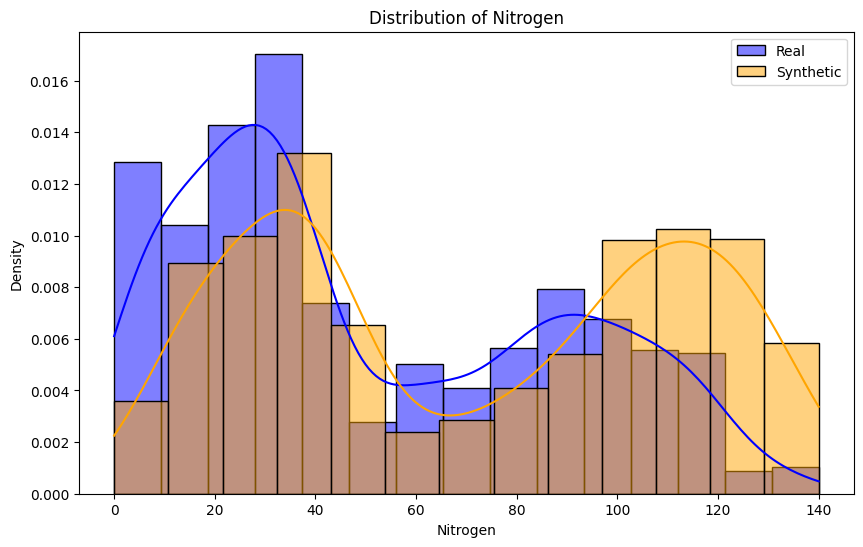

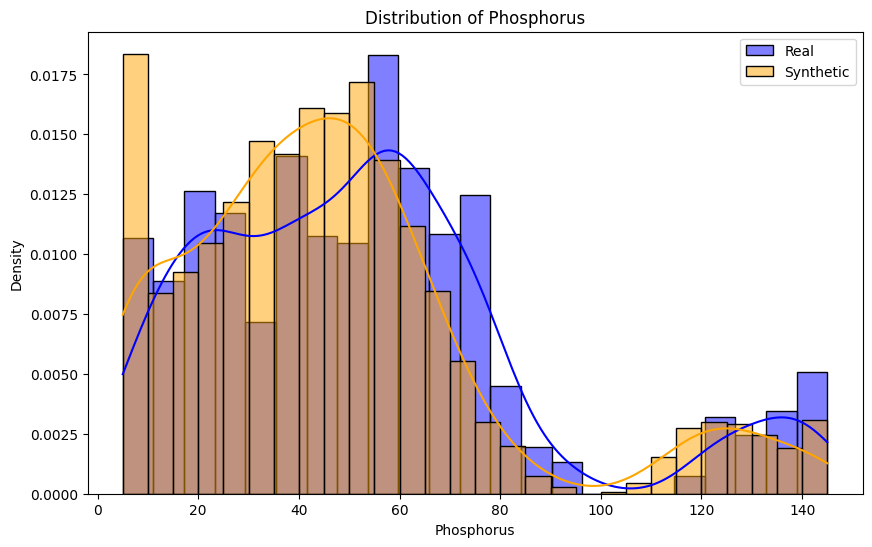

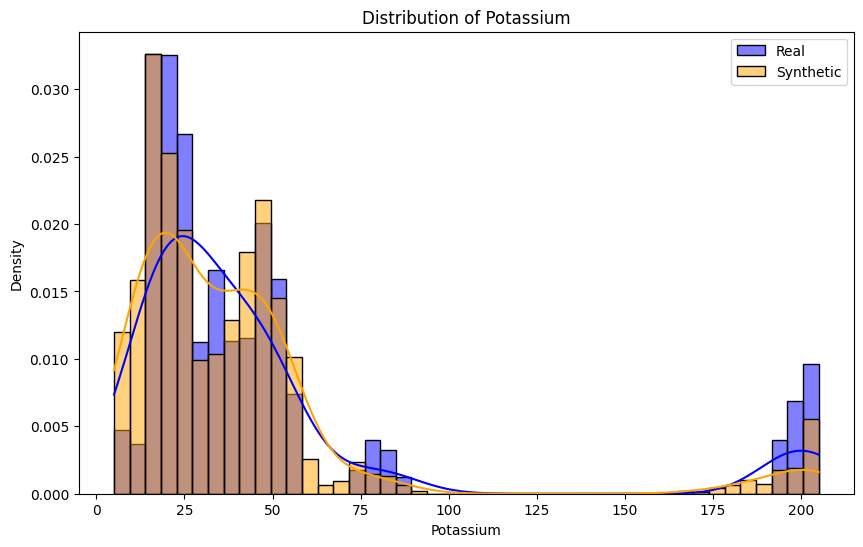

In [7]:
# Select columns to visualize
columns_to_visualize = data.columns[:3]  # Modify this to visualize different columns or more columns
for column in columns_to_visualize:
    plot_distributions(data, synthetic_data, column)

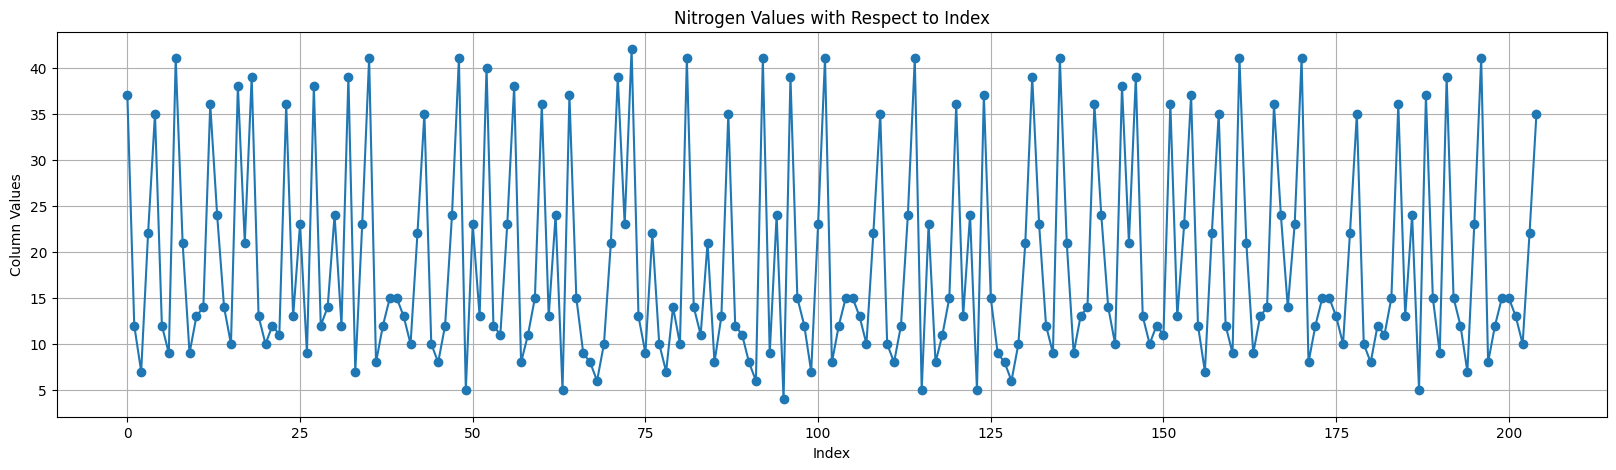

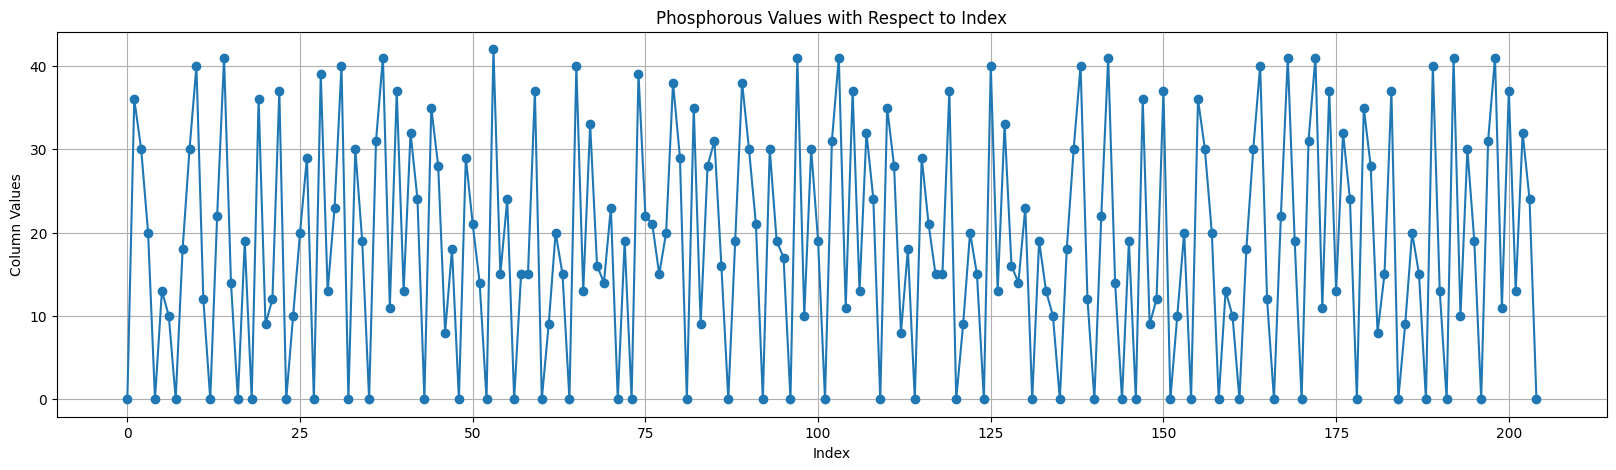

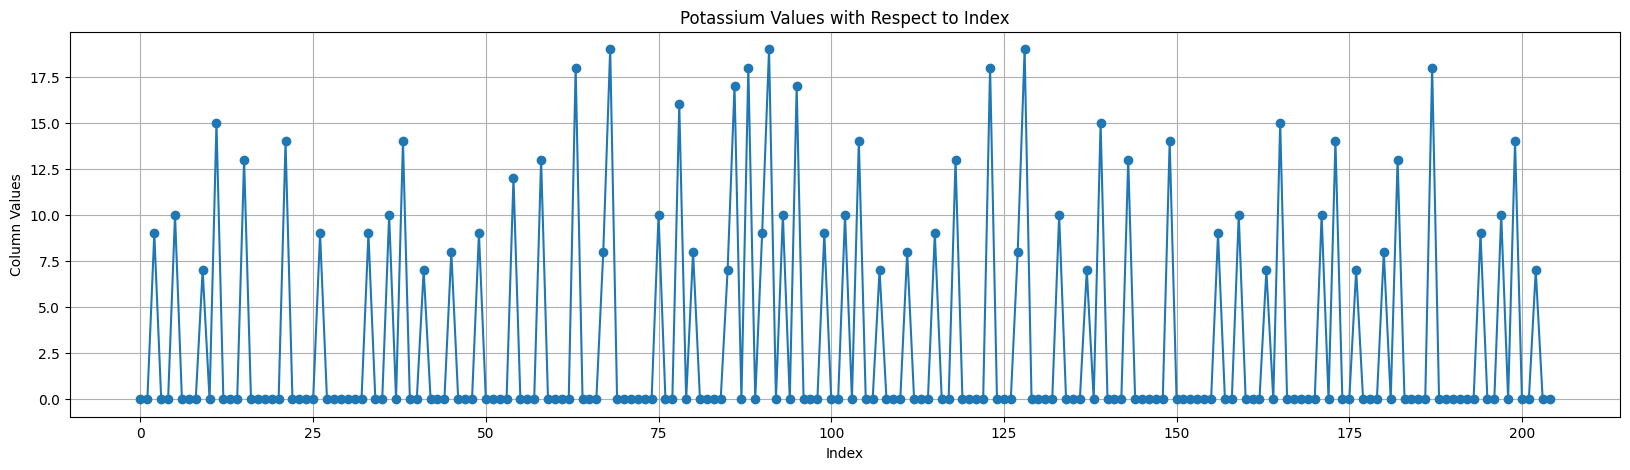

In [8]:
csv_file_path = '../datasets/crop_fertilizers.csv'
data = pd.read_csv(csv_file_path)

columns_to_visualize = ['Nitrogen','Phosphorous','Potassium']  # Modify this to visualize different columns or more columns
for column in columns_to_visualize:
    plt.figure(figsize=(20, 5))
    plt.plot(data.index, data[column], marker='o')
    plt.xlabel('Index')
    plt.ylabel('Column Values')
    plt.title(f'{column} Values with Respect to Index')
    plt.grid(True)
    plt.show()

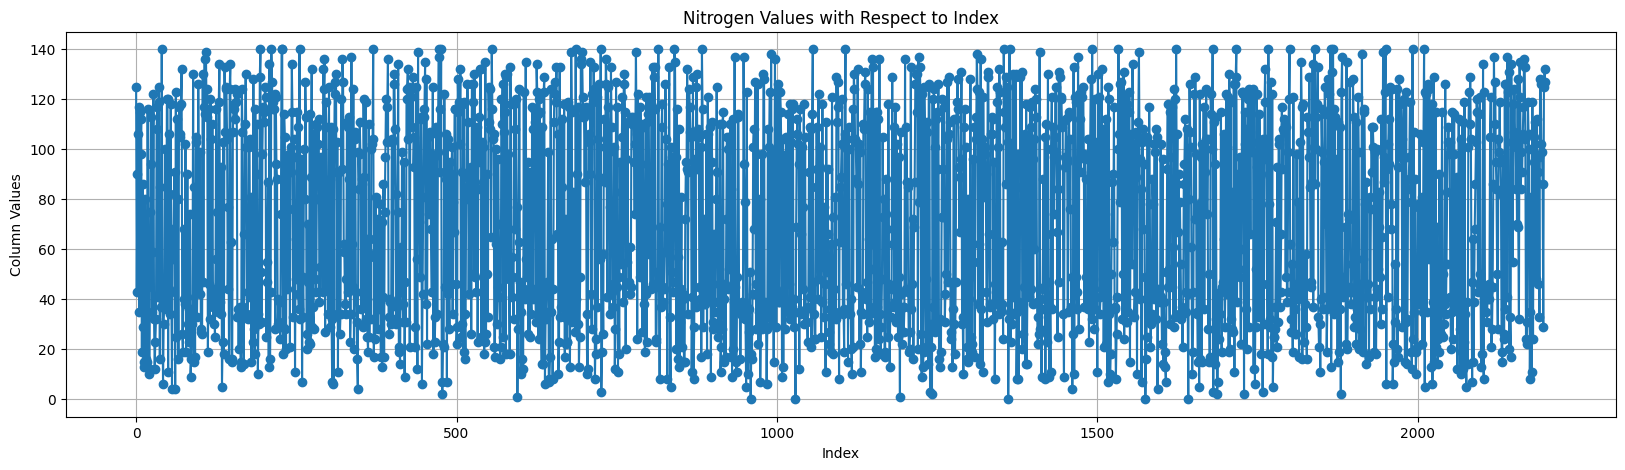

KeyError: 'Phosphorous'

<Figure size 2000x500 with 0 Axes>

In [9]:
csv_file_path = '../datasets/synthetic_output.csv'
data = pd.read_csv(csv_file_path)

columns_to_visualize = ['Nitrogen','Phosphorous','Potassium']  # Modify this to visualize different columns or more columns
for column in columns_to_visualize:
    plt.figure(figsize=(20, 5))
    plt.plot(data.index, data[column], marker='o')
    plt.xlabel('Index')
    plt.ylabel('Column Values')
    plt.title(f'{column} Values with Respect to Index')
    plt.grid(True)
    plt.show()

In [ ]:
diagnostic = run_diagnostic(
    real_data=data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1904.67it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 462.44it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [ ]:
quality_report = evaluate_quality(
    data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 1131.79it/s]|
Column Shapes Score: 100.0%

(2/2) Evaluating Column Pair Trends: |█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 133.44it/s]|
Column Pair Trends Score: 100.0%

Overall Score (Average): 100.0%



In [ ]:
# Purpose of ks_2samp
# The Kolmogorov-Smirnov (KS) test is used to determine whether two samples come from the same distribution.
# The null hypothesis (H0) of the test is that the two samples are drawn from the same continuous distribution.

In [ ]:
# Kolmogorov-Smirnov Test for more detailed evaluation
def ks_test(real_data, synthetic_data, column):
    statistic, p_value = ks_2samp(real_data[column], synthetic_data[column])
    return statistic, p_value

# Perform KS test on selected columns
ks_test_results = {}
for column in columns_to_visualize:
    ks_stat, ks_p_value = ks_test(data, synthetic_data, column)
    ks_test_results[column] = (ks_stat, ks_p_value)
    print(f"KS Test for {column}: statistic={ks_stat}, p-value={ks_p_value}")

print(f"Synthetic data has been saved to {synthetic_csv_file_path}")

KS Test for Nitrogen: statistic=0.0, p-value=1.0
KS Test for Phosphorous: statistic=0.0, p-value=1.0
KS Test for Potassium: statistic=0.0, p-value=1.0
Synthetic data has been saved to ../datasets/synthetic_output.csv


In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Load the datasets
csv1_file_path = '../datasets/synthetic_output.csv'
csv2_file_path = '../datasets/crop_fertilizers.csv'

train_data = pd.read_csv(csv1_file_path)
test_data = pd.read_csv(csv2_file_path)

# Encode categorical features
label_encoders = {}
for column in train_data.columns:
    if train_data[column].dtype == 'object':
        le = LabelEncoder()
        train_data[column] = le.fit_transform(train_data[column])
        test_data[column] = le.transform(test_data[column])
        label_encoders[column] = le
        
# Separate features and target variable for training data
X_train = train_data.iloc[:, :-1]  # All columns except the last one
y_train = train_data.iloc[:, -1]   # The last column

# Separate features and target variable for testing data
X_test = test_data.iloc[:, :-1]    # All columns except the last one
y_test = test_data.iloc[:, -1]     # The last column

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate and print accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.2829
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.08      0.03      0.05        29
           2       0.29      0.11      0.16        18
           3       0.23      0.17      0.19        30
           4       0.14      0.17      0.15        36
           5       0.24      0.39      0.30        38
           6       0.56      0.66      0.60        44

    accuracy                           0.28       205
   macro avg       0.22      0.22      0.21       205
weighted avg       0.26      0.28      0.26       205



In [ ]:
import pandas as pd
from sdv.single_table import CTGANSynthesizer

# Load the CSV file into a DataFrame
data = pd.read_csv('crop_fertilizers.csv')

# Display the first few rows of the DataFrame
print(data.head())

# Initialize the CTGAN model
ctgan = CTGAN()

# Fit the model to your data
ctgan.fit(data)

# Define the number of synthetic rows you want to generate
num_samples = 1000

# Generate synthetic data
synthetic_data = ctgan.sample(num_samples)

# Display the first few rows of the synthetic data
print(synthetic_data.head())

# Save the synthetic data to a CSV file
synthetic_data.to_csv('synthetic_data.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'crop_fertilizers.csv'

In [ ]:
pip install sdv

Note: you may need to restart the kernel to use updated packages.
